# Data Mining / Prospeção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 3 - Classification/Regression

## Logistics

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 3 and 4**  for groups of 2 and 3 students, respectively.
    * In Task **4**, groups of 2 and 3 students should try 2 and 3 ensemble approaches, respectively.

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of ~~`May, 9th (23:59)`~~ `May, 16th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P3.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`RestaurantsRevenue.csv`**, a modified version of the test dataset used in Kaggle's competition ["Restaurant Revenue Prediction"](https://www.kaggle.com/c/restaurant-revenue-prediction/overview). 

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the revenue, and a
2. **Classification Task**: predict a revenue category.

The available variables are:

* **Id :** Restaurant id. 
* **Open Date :** opening date for a restaurant
* **City :** City that the restaurant is in. Note that there are unicode in the names. 
* **City Group:** Type of the city. Big cities, or Other. 
* **Type:** Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* **P1, P2 - P37:** There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.


The targets are:
1. **`Revenue`:** The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 
2. **`RevenueCategory`** - the revenue category, where price can be below 12000 ("<12K"), between 12000 and 20000 ("12K-20K"), or above 20000 (">20K"). This is the target variable that you're trying to predict in the classification task. 

## Team Identification

**GROUP 21**

Students:

* António Rebelo - 55761
* Filipa Serrano - 55767

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%pprint #disables pretty printing to see printed lists horizontally
%matplotlib inline

pd.set_option("display.precision",2)
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

Pretty printing has been turned OFF


## 1. Load and Preprocess Dataset

Here you might consider useful to think about:
1. Missing Value Imputation
2. Feature Selection
3. Class Imbalance

In [3]:
restaurant_df = pd.read_csv("RestaurantsReveneu.csv", index_col=0)

Let's check the data types of the dataframe

In [4]:
restaurant_df.dtypes

Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

Let's attribute some more explicit data types to the columns that have type 'object'. From the sample of the table, it seems that the columns 'City Group' and 'Type' might be categorical. We will confirm this by checking which possible values they take.

In [5]:
restaurant_df['City Group'].unique()

array(['Other', 'Big Cities'], dtype=object)

In [6]:
restaurant_df['Type'].unique()

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

Let's also check the possible values for the feature cities:

In [7]:
restaurant_df['City'].unique()

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [8]:
restaurant_df = restaurant_df.astype({'Open Date': 'datetime64', 'City': 'category', 'City Group': 'category', 'Type': 'category'})

Regarding the date column, we will split it into a month and day column, since these are the attributes that seem more relevant for estimating revenue and revenue category.

In [9]:
restaurant_df['day'] = pd.DatetimeIndex(restaurant_df['Open Date']).day
restaurant_df['month'] = pd.DatetimeIndex(restaurant_df['Open Date']).month
restaurant_df= restaurant_df.drop(['Open Date'], axis=1)

In [10]:
restaurant_df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,day,month
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10033.0,22,1
1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,9355.0,18,3
2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,11353.0,30,10
3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,10828.0,6,5
4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,9354.0,31,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,9479.0,5,1
99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,8277.0,18,7
99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,18654.0,29,12


### 1.1 Missing Value Imputation

Let's look at the null values present in our dataset

In [11]:
pd.concat([restaurant_df.isnull().sum(axis = 0)/restaurant_df.shape[0]*100,restaurant_df.isnull().sum(axis = 0)],axis=1,keys=['Null percentage','Number of Nulls']).transpose()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,day,month
Null percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Number of Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since there are no null values, there is no need for missing value imputation. 
We could eventually consider the zeros in the P columns as missing values and impute them, but this does not seem like a good approach in this case, since we don't know exactly what each column represents, so we would have trouble understandind which approach would be better to make the imputation.

### 1.2 Encoding Categorical Features

Let's start by creating the target variable based on the revenue column. This will be called 'Revenue Category'

In [12]:
restaurant_df['RevenueCategory'] = pd.cut(restaurant_df['revenue'], [0,12000, 20000,max(restaurant_df['revenue'])], labels =["<12K","12K-20K",">20K"] )

Let's do one hot encoding on the city group and type features. Ideally, we would do it too for the cities, but that would create too many features, making the models harder to compute, so we will use LabelEncoder.

In [13]:
from sklearn.preprocessing import LabelEncoder

one_hot = pd.get_dummies(restaurant_df[['City Group', 'Type']])
le = LabelEncoder()
city_encoding = le.fit_transform(restaurant_df['City'].values)
restaurant_df_encode= restaurant_df.drop(['City Group', 'Type', 'City'], axis=1)
restaurant_df_encode= restaurant_df_encode.join(one_hot)
restaurant_df_encode['City'] = city_encoding
restaurant_df_encode

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,day,month,RevenueCategory,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB,City
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10033.0,22,1,<12K,0,1,0,1,0,0,38
1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,9355.0,18,3,<12K,0,1,0,0,1,0,27
2,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,11353.0,30,10,<12K,1,0,0,1,0,0,3
3,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,10828.0,6,5,<12K,0,1,0,0,1,0,26
4,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,9354.0,31,7,<12K,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,9479.0,5,1,<12K,0,1,0,1,0,0,4
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,8277.0,18,7,<12K,0,1,0,0,1,0,38
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,18654.0,29,12,12K-20K,1,0,0,0,1,0,54


since 'City Group' is a binary variable, we only need to keep one of the encoded variables

In [14]:
restaurant_df_encode.drop('City Group_Other', axis=1, inplace=True)

At this point let's split the dependant and independent variables

In [15]:
X = restaurant_df_encode.drop(['RevenueCategory', 'revenue'], axis=1)
y = restaurant_df_encode['RevenueCategory']
y_reg = restaurant_df_encode['revenue']

#### Basic EDA

Before going on, this seems like a good point to do some basic EDA. Let's look at the correlation matrix

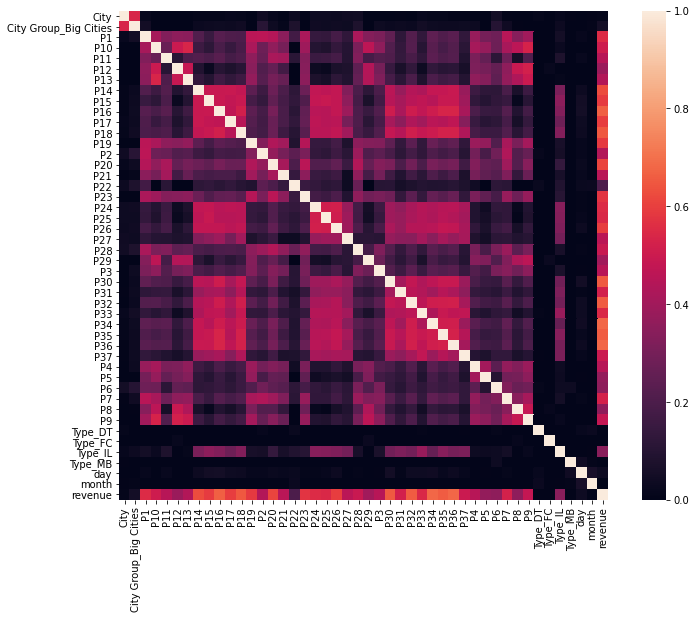

In [16]:
sorted_df = restaurant_df_encode.reindex(sorted(restaurant_df_encode.columns), axis=1)
corrmat = sorted_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1., vmin=0, square=True);

It seems like there are many features that are probably colinear in P* features. We'll address that by using PCA to do dimensionality reduction. 

Let's also look at the distribution of the target variable

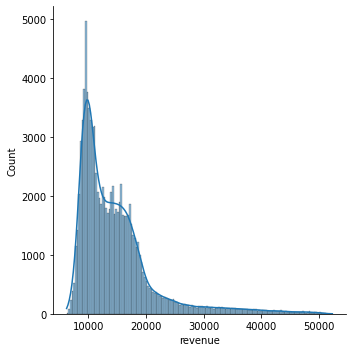

In [17]:
sns.displot(y_reg,kde=True,);

The revenue is heavily right skewed and does not follow a normal distribution. Applying the log might help, so we'll try it later.
Regarding the categorical variable we'll take a closer look when we deal with class imbalance.

### 1.3 Scaling

We will scale the data using MinMaxScaler to ensure that all the variables are on the same scale, which is important not only for the dimensionality reduction step, but also for the performance of the classifiers and regressors.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)

### 1.3 Feature Selection/ Dimensionality Reduction

Regarding Feature Selection and Dimentionality Reduction, we will try to use feature selection on the P columns, based on TP05, as it is suggested in the project description.

In [19]:
P_cols = X.drop(['day', 'month',
       'City Group_Big Cities', 'Type_DT', 'Type_FC',
       'Type_IL', 'Type_MB', 'City'], axis=1).columns

Let's analyse feature selection possibilities using the chi2, f score and mutual info score functions. This method is specially suited for classification.

In [20]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

X_P= X[P_cols].values
y_P= y.values

chi2_score, chi_2_p_value = chi2(X_P,y_P)
f_score, f_p_value = f_classif(X_P,y_P)
mut_info_score = mutual_info_classif(X_P,y_P)

df=pd.DataFrame({"names": restaurant_df_encode[P_cols].columns, 
                "chi2": chi2_score,
                "chi2_p": chi_2_p_value,
                "F": f_score,
                "F_p": f_p_value,
                "MI": mut_info_score})
df.sort_values(by=['MI'], ascending=False)

,names,chi2,chi2_p,F,F_p,MI
33,P34,11004.48,0.00e+00,23217.37,0.0,0.23
35,P36,11589.85,0.00e+00,23002.61,0.0,0.23
31,P32,9560.48,0.00e+00,20861.97,0.0,0.23
15,P16,11874.83,0.00e+00,22388.45,0.0,0.23
34,P35,11746.26,0.00e+00,22439.27,0.0,0.23
17,P18,10698.78,0.00e+00,21279.16,0.0,0.22
29,P30,10449.12,0.00e+00,20724.72,0.0,0.22
26,P27,6104.26,0.00e+00,11503.89,0.0,0.21
25,P26,8375.70,0.00e+00,16769.04,0.0,0.21
13,P14,8258.95,0.00e+00,17058.64,0.0,0.21


At this point we would choose to keep the features with lowest p-value or highest MI, but with this method and our data, it is not clear which ones we should choose. 

Perhaps a dimentionality reduction technique, such as PCA will be better to "summarize" all these columns into few dimensions and it has the advantage that it works well for both regression and classification problems.

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X[P_cols])
P_cols_pca = pd.DataFrame(pca.transform(X[P_cols]))
P_cols_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-0.51,0.11,-0.14,0.41,0.02,-1.26e-01,-0.12,-4.34e-02,-0.10,-0.07,-1.64e-01,-0.09,-6.74e-02,1.18e-01,-0.04,-2.51e-02,0.01,3.93e-03,-0.08,0.01,-8.48e-02,-2.72e-02,9.12e-02,-0.07,-9.77e-02,0.03,-6.79e-02,0.03,1.32e-02,2.34e-03,2.52e-03,-0.07,3.96e-02,9.39e-02,-1.91e-02,-3.85e-02,1.01e-02
1,-0.58,0.07,0.02,0.19,-0.03,-6.93e-03,0.07,1.52e-03,0.15,0.07,-4.90e-02,-0.03,6.28e-02,1.23e-02,0.02,1.62e-01,-0.10,-1.79e-02,-0.03,0.06,2.65e-02,-2.07e-02,-1.76e-02,-0.07,9.47e-02,0.05,-1.95e-03,0.05,3.33e-02,-1.93e-02,1.69e-02,0.01,-8.20e-03,-9.12e-03,-2.77e-02,-1.66e-03,-5.64e-03
2,-0.32,0.11,0.69,-0.03,0.26,6.31e-02,0.05,1.44e-03,0.08,0.04,-8.96e-02,0.12,2.05e-02,-1.83e-02,-0.05,6.93e-02,-0.02,-2.08e-02,0.02,0.09,4.97e-03,-2.01e-02,-1.08e-03,-0.13,1.83e-02,0.11,-7.71e-02,0.01,8.38e-03,-1.46e-02,1.37e-02,0.02,7.47e-04,1.65e-02,1.15e-02,2.97e-02,-1.06e-03
3,-0.44,0.05,-0.03,0.12,-0.03,-5.59e-02,0.11,-2.06e-02,-0.04,0.10,-1.03e-01,-0.02,1.61e-02,-1.95e-02,0.10,7.30e-02,-0.06,-2.72e-02,0.06,0.06,-6.79e-02,8.87e-02,2.01e-01,-0.05,7.23e-02,0.07,1.18e-02,-0.05,8.07e-02,-8.89e-03,6.88e-02,0.07,1.11e-01,-2.84e-02,1.05e-01,-8.38e-02,-5.73e-02
4,-0.57,0.11,-0.14,0.24,-0.18,-2.17e-01,-0.09,-9.33e-02,-0.06,0.04,-3.94e-02,-0.02,2.03e-02,1.03e-03,0.01,-1.21e-01,0.06,1.59e-02,0.04,0.05,2.53e-02,-6.14e-02,3.35e-02,0.10,-2.59e-03,-0.02,-1.76e-01,0.06,1.03e-01,-3.85e-02,-1.99e-02,-0.01,-1.64e-02,1.69e-03,9.38e-03,1.73e-02,4.16e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.56,0.04,0.26,0.08,-0.10,1.46e-01,0.14,1.00e-01,-0.08,0.02,3.24e-02,0.03,-1.48e-01,3.20e-03,-0.12,-9.09e-02,0.03,-6.65e-03,-0.03,-0.01,-5.24e-02,9.03e-02,-3.16e-02,-0.10,-8.85e-03,-0.05,-2.13e-02,-0.01,-9.52e-03,4.26e-03,-1.65e-03,0.01,2.91e-03,-1.12e-03,-4.63e-02,2.00e-03,2.45e-03
99996,-0.78,-0.04,-0.42,-0.10,0.32,-2.17e-01,-0.08,5.38e-03,0.06,-0.02,-5.06e-02,-0.06,-1.74e-01,-4.49e-02,0.02,2.18e-02,0.01,6.20e-02,0.03,-0.06,-2.09e-02,1.20e-01,3.18e-03,-0.04,-2.94e-02,-0.03,-9.84e-02,0.02,-3.74e-02,-3.72e-02,1.34e-01,-0.05,-6.86e-02,8.25e-02,-6.70e-02,4.62e-02,-1.02e-01
99997,0.31,-0.75,0.57,-0.03,0.13,1.54e-02,-0.15,5.62e-02,-0.14,-0.06,4.88e-03,0.10,-6.64e-03,-2.98e-02,-0.08,9.88e-02,-0.04,-6.13e-02,0.02,-0.04,3.59e-02,-5.20e-02,-4.71e-02,0.09,-2.06e-02,0.08,-2.53e-02,-0.04,-1.92e-02,-1.12e-02,4.47e-02,0.21,7.38e-02,1.26e-01,3.62e-02,-7.63e-02,-9.29e-02
99998,1.39,1.42,0.16,-0.20,-0.14,1.59e-01,0.15,-3.29e-01,0.06,-0.47,7.46e-02,0.02,5.89e-02,-2.24e-01,-0.34,-7.62e-02,-0.07,5.95e-03,0.07,-0.23,3.38e-02,2.41e-02,7.83e-03,0.08,-1.15e-01,-0.15,1.39e-01,-0.12,-6.66e-02,2.97e-02,-8.81e-02,0.03,-5.33e-04,-4.21e-02,-1.18e-01,-6.01e-02,-1.91e-02


Let's see how how much variance each of the components explains:

In [22]:
print('Fraction of Variance explained by each component')
for i in P_cols_pca.columns:
  print("{} component: {}".format(i, round(pca.explained_variance_[i]/sum(pca.explained_variance_),3)))

Fraction of Variance explained by each component
0 component: 0.276
1 component: 0.134
2 component: 0.078
3 component: 0.041
4 component: 0.028
5 component: 0.024
6 component: 0.024
7 component: 0.021
8 component: 0.021
9 component: 0.019
10 component: 0.018
11 component: 0.018
12 component: 0.017
13 component: 0.017
14 component: 0.016
15 component: 0.015
16 component: 0.014
17 component: 0.014
18 component: 0.013
19 component: 0.013
20 component: 0.013
21 component: 0.013
22 component: 0.013
23 component: 0.012
24 component: 0.012
25 component: 0.012
26 component: 0.011
27 component: 0.011
28 component: 0.011
29 component: 0.01
30 component: 0.01
31 component: 0.009
32 component: 0.009
33 component: 0.008
34 component: 0.008
35 component: 0.008
36 component: 0.007


The first 4 components explain more than 50% of the variance. Perhaps it would be reasonable to include even more components but for now let's just keep those 4 in order to keep computational times reasonable.

In [23]:
pca = PCA(n_components = 4)
pca.fit(X[P_cols])
P_cols_pca = pd.DataFrame(pca.transform(X[P_cols]))
P_cols_pca

,0,1,2,3
0,-0.51,0.11,-0.14,0.41
1,-0.58,0.07,0.02,0.19
2,-0.32,0.11,0.69,-0.03
3,-0.44,0.05,-0.03,0.12
4,-0.57,0.11,-0.14,0.24
...,...,...,...,...
99995,-0.56,0.04,0.26,0.08
99996,-0.78,-0.04,-0.42,-0.10
99997,0.31,-0.75,0.57,-0.03
99998,1.39,1.42,0.16,-0.21


In [24]:
P_cols_pca.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
X = X.drop(P_cols, axis=1)
X_pca = X.join(P_cols_pca)
X_pca

,day,month,City Group_Big Cities,Type_DT,Type_FC,Type_IL,Type_MB,City,PCA1,PCA2,PCA3,PCA4
Id,,,,,,,,,,,,
0,0.70,0.00,0.0,0.0,1.0,0.0,0.0,0.68,-0.51,0.11,-0.14,0.41
1,0.57,0.18,0.0,0.0,0.0,1.0,0.0,0.48,-0.58,0.07,0.02,0.19
2,0.97,0.82,1.0,0.0,1.0,0.0,0.0,0.05,-0.32,0.11,0.69,-0.03
3,0.17,0.36,0.0,0.0,0.0,1.0,0.0,0.46,-0.44,0.05,-0.03,0.12
4,1.00,0.55,0.0,0.0,1.0,0.0,0.0,0.02,-0.57,0.11,-0.14,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.13,0.00,0.0,0.0,1.0,0.0,0.0,0.07,-0.56,0.04,0.26,0.08
99996,0.57,0.55,0.0,0.0,0.0,1.0,0.0,0.68,-0.78,-0.04,-0.42,-0.10
99997,0.93,1.00,1.0,0.0,0.0,1.0,0.0,0.96,0.31,-0.75,0.57,-0.03


### 1.4 Dealing with Class Imbalance

Let's analyse the proportions of each target class to see if we need to deal with class imbalance

In [25]:
y.value_counts(normalize=True)

12K-20K    0.44
<12K       0.43
>20K       0.13
Name: RevenueCategory, dtype: float64

We can see that the class 2, which corresponds to the ">20K" category, is significantly smaller than the others. We will solve this by oversampling it using SMOTE or a RandomOversampler. We could also undersample the majority classes, but since it's a 1:4 relationship we would have discard 60% of the data, which is not acceptable, so we'll stick with oversampling.

Since we are doing cross validation, we need to do it at training time in order not to contaminate the test set. Hence we will not address this issue now

Finally, let's import the necessary tools for all the machine learning tasks below.

In [26]:
#Common Model Algorithms
from sklearn import tree, linear_model, neighbors, naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    make_scorer , 
    precision_score, 
    recall_score, 
    f1_score
)
from sklearn.model_selection import train_test_split

#For rebalancing
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import resample


#library to time models 
import time


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

### 2.1 Classification

We will perform GridSearch over all the models at once to make comparisons easier. For that we have created a GridSearch function that loops through the models and does the following:
* Oversampling
* Cross-validation
* Gridsearch
* Saves all the quantities of interest in a table (MLA compare)
* Times partial and total run times

In [27]:
MLA = [  
     #Naive Bayes
     naive_bayes.GaussianNB(),
    
     #Nearest Neighbor
     neighbors.KNeighborsClassifier(),
    
     #Trees    
     tree.DecisionTreeClassifier()
    ]

In [28]:
def GridSearch(df, target, MLA , score = 'accuracy'):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #score - criteria to choose best set of hyperparameters

    grid_seed = [0]
    


    #IMPORTANT NOTE: the order of the parameters in grid_param has to match the order of the models in MLA
    grid_param = [
        
                 #GaussianNB - 
                 [{}],
        
                 

                 [{
                 #KNeighborsClassifier 
                 'clf__n_neighbors': [5,10,50],
                 'clf__weights': ['uniform', 'distance'],
                 'clf__algorithm': ['auto'],
                 'clf__metric': ['minkowski', 'manhattan']
                 }],
        
                
                  
                  #DecisionTreeClassifier
                  [{'clf__criterion': ['gini', 'entropy'], 
                  'clf__splitter': ['best'], 
                  'clf__max_depth': [2,4,6,None],
                  'clf__min_samples_split': [2,5,10,.03],
                  'clf__min_samples_leaf': [1,5,10,.03], 
                  'clf__max_features': [None, 'auto'],
                  'clf__random_state': grid_seed 
                 }]
                    
            ]

    MLA_columns = [
        'Model Name', 
        'Best Parameters', 
        'Fit Time', 
        'Mean Accuracy', 
        'Std Accuracy', 
        'Mean precision', 
        'Std precision', 
        'Mean recall',
        'Std recall',
        'Mean F1',
        'Std F1',
    ]
    # Table to store metrics
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    row_index = 0
    
    # Cross validation
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 
    
    # Start total timer
    start_total = time.perf_counter() 
    
    print('Current Model:')
    for alg, param in zip (MLA, grid_param): #https://docs.python.org/3/library/functions.html#zip
        MLA_name = alg.__class__.__name__
        print(MLA_name)
        
        # Pipeline to perform oversampling
        model = Pipeline([
        ('smote', RandomOverSampler(sampling_strategy='auto',random_state=0)),
        ('clf', alg)
        ],)
        
        #Start partial timer
        start = time.perf_counter()  
        
        # Gridsearch
        best_search = model_selection.GridSearchCV(
            estimator = model, 
            param_grid = param[0], 
            cv = cv_split, 
            scoring = score,
            n_jobs=-1,
            refit = 'f1_weighted',
        )
        
        best_search.fit(df,target)
        
        # Stop partial timer
        run = time.perf_counter() - start
        print('Time to gridsearch:',run)

        best_param = best_search.best_params_
        model.set_params(**best_param) 
        
        # Record metrics
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Best Parameters'] = str(best_param)
        MLA_compare.loc[row_index, 'Fit Time'] = best_search.cv_results_['mean_fit_time'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean Accuracy'] = best_search.cv_results_['mean_test_accuracy'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std Accuracy'] = best_search.cv_results_['std_test_accuracy'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean precision'] = best_search.cv_results_['mean_test_precision'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std precision'] = best_search.cv_results_['std_test_precision'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean recall'] = best_search.cv_results_['mean_test_recall'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std recall'] = best_search.cv_results_['std_test_recall'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean F1'] = best_search.cv_results_['mean_test_f1_weighted'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std F1'] = best_search.cv_results_['std_test_f1_weighted'][best_search.best_index_]
        row_index+=1


    #stop timer
    run_total = time.perf_counter() - start_total


    print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
    # Sort metrics by most relevant metric
    MLA_compare.sort_values(by = ['Mean F1'], ascending = False, inplace = True)
    return MLA_compare

We define the scoring functions

In [29]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In order to speed up gridsearch the we will solve class imbalance with RandomOverSampler when performing gridsearch

In [30]:
classification_results = GridSearch(X_pca, y, MLA , score = scoring)
classification_results

Current Model:
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Time to gridsearch: 6.700860188999286
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Time to gridsearch: 717.4016168499993
DecisionTreeClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Time to gridsearch: 1875.4690362079991
Total optimization time was 43.33 minutes.


,Model Name,Best Parameters,Fit Time,Mean Accuracy,Std Accuracy,Mean precision,Std precision,Mean recall,Std recall,Mean F1,Std F1
2,DecisionTreeClassifier,"{'clf__criterion': 'gini', 'clf__max_depth': 6...",1.4,0.94,0.0025,0.92,0.005,0.95,0.0021,0.94,0.0024
1,KNeighborsClassifier,"{'clf__algorithm': 'auto', 'clf__metric': 'min...",1.5,0.93,0.0025,0.92,0.003,0.93,0.0019,0.93,0.0025
0,GaussianNB,{},0.72,0.87,0.0031,0.84,0.0043,0.88,0.0037,0.87,0.003


In [31]:
classification_results['Best Parameters'][1]

"{'clf__algorithm': 'auto', 'clf__metric': 'minkowski', 'clf__n_neighbors': 10, 'clf__weights': 'uniform'}"

In [32]:
classification_results['Best Parameters'][2]

"{'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__max_features': None, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2, 'clf__random_state': 0, 'clf__splitter': 'best'}"

### 2.2 Performance Evaluation

Let's see take a closer look at the best models. For that, we define the Fit_class function that builds a classification report and confusion matrices for the models. Also the cross validated predictions are saved in order to build a confusion matrix in which every data point has been classified.

In [33]:
MLA_best_models = [  
    
     #Nearest Neighbor
     neighbors.KNeighborsClassifier(
         n_neighbors= 10, 
         algorithm = 'auto', 
         metric='minkowski',
         weights= 'uniform',
     ),
    
     #Trees    
     tree.DecisionTreeClassifier(
         criterion= 'gini', 
         max_depth= 6, 
         max_features= None, 
         min_samples_leaf= 10, 
         min_samples_split= 2, 
         random_state= 0, 
         splitter= 'best',
    )
    ]

In [34]:
def Fit_class(df, target, MLA, balancing = 'RandomOverSampler',draw_confusion_matrix=True,display_report = True):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #draw_confusion_matrix - show confusion matrix if true
    #display_report - prints table with metrics
    
    #create subplots for confusion matrix
    if draw_confusion_matrix:
        fig, ax = plt.subplots(1,len(MLA),figsize=(20,5))
    
    
    #split dataset in cross-validation
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 
    #create table to compare MLA metrics
    MLA_columns = ['Model Name', 'Parameters','Mean Accuracy', 'Mean F1','Mean Precision','Mean Recall','Fit Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)



    #index through MLA and save performance to table
    row_index = 0
    
    #dictionary with reports
    report_dict = {}
    for alg in MLA:
        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
        
        #Rebalancing
        if balancing == 'RandomOverSampler':
            model = Pipeline([
            ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto',random_state=0)),
            ('classification', alg)
            ])
        elif balancing == 'SMOTE':
            model = Pipeline([
            ('smote', SMOTE(n_jobs=-1,random_state=0,sampling_strategy='auto' , k_neighbors=15)),
            ('classification', alg)
            ])
        else:
            model = Pipeline([
            ('classification', alg)
            ])

        #make predictions with cross validation: 
        predictions = (model_selection.cross_val_predict(model, df, target, cv  = cv_split, 
                                                     n_jobs =-1))
        
        
        #build classification report
        
        if display_report == True:
            print("Classification Report for model:",MLA_name)
            print(classification_report(target, predictions))
            print("------------------------------------------------")
        else:
            report = classification_report(target, predictions,output_dict=True)
            report_dict[MLA_name] =  report
        
        
        if draw_confusion_matrix:
            #confusion matrix setting
            cf_matrix = metrics.confusion_matrix(target,predictions)


            group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
            group_percentages = ["{0:.1%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
            labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(len(cf_matrix),len(cf_matrix))

            cf_matrix = cf_matrix.astype(float)
            for i in range(cf_matrix.shape[0]):
                cf_matrix[i] = cf_matrix[i]/ cf_matrix[i].sum()
            
            
            #confusion matrix plot
            sns.heatmap(cf_matrix, fmt='', cmap='Blues',ax=ax[row_index],annot=labels,cbar=False,
                        square=True,xticklabels=["12K-20K","<12K",">20K"], yticklabels=["12K-20K","<12K",">20K"])
            ax[row_index].set_title(MLA_name)
        row_index+=1
    
    if display_report == False:
        return report_dict

Using SMOTE  when performing gridsearch is impractical because it takes too long, but now we can test it for the best models and compare the results with RandomOverSampler

Classification Report for model: KNeighborsClassifier
              precision    recall  f1-score   support

     12K-20K       0.93      0.91      0.92     43933
        <12K       0.95      0.95      0.95     43418
        >20K       0.88      0.93      0.90     12649

    accuracy                           0.93    100000
   macro avg       0.92      0.93      0.92    100000
weighted avg       0.93      0.93      0.93    100000

------------------------------------------------
Classification Report for model: DecisionTreeClassifier
              precision    recall  f1-score   support

     12K-20K       0.94      0.92      0.93     43933
        <12K       0.96      0.95      0.96     43418
        >20K       0.87      0.96      0.91     12649

    accuracy                           0.94    100000
   macro avg       0.92      0.95      0.93    100000
weighted avg       0.94      0.94      0.94    100000

------------------------------------------------


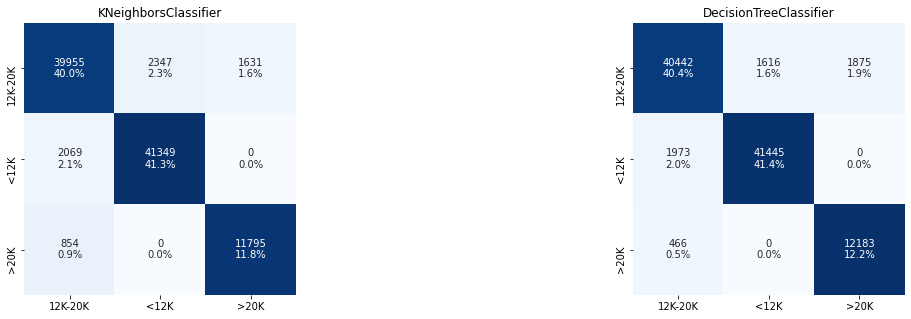

In [35]:
Fit_class(X_pca, y, MLA_best_models, balancing = 'RandomOverSampler',draw_confusion_matrix=True,display_report = True)

Classification Report for model: KNeighborsClassifier
              precision    recall  f1-score   support

     12K-20K       0.93      0.91      0.92     43933
        <12K       0.95      0.95      0.95     43418
        >20K       0.89      0.94      0.91     12649

    accuracy                           0.93    100000
   macro avg       0.92      0.93      0.93    100000
weighted avg       0.93      0.93      0.93    100000

------------------------------------------------
Classification Report for model: DecisionTreeClassifier
              precision    recall  f1-score   support

     12K-20K       0.94      0.92      0.93     43933
        <12K       0.96      0.95      0.96     43418
        >20K       0.86      0.96      0.91     12649

    accuracy                           0.94    100000
   macro avg       0.92      0.95      0.93    100000
weighted avg       0.94      0.94      0.94    100000

------------------------------------------------


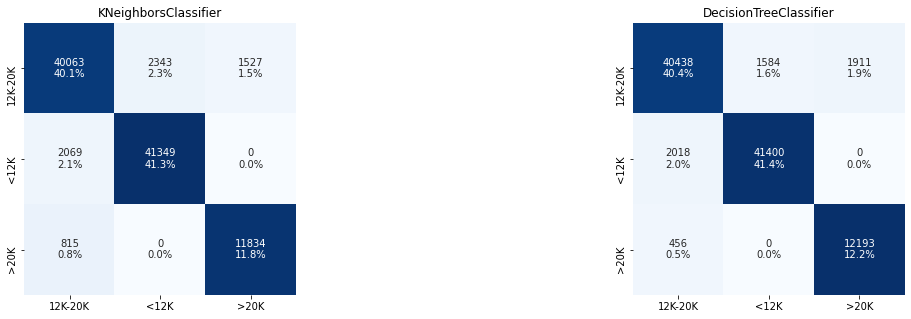

In [36]:
Fit_class(X_pca, y, MLA_best_models, balancing = 'SMOTE',draw_confusion_matrix=True,display_report = True)

In sum here are the takeaways from training these classifiers:

* the results are very good achieving a maximum accuracy of 94%. The confusion matrices are almost diagonal and the models have learned the minority class properly. It should be mentioned that even so, looking at the classification report we see that the metrics for the minority class are slightly worse than the others.
* doing pca was a good choice since we've managed to reduce the complexity of the training drastically while keeping great accuracy.
* the best model was the DecisionTreeClassifier and almost as good was the KneighborsClassifier.
* GaussianNB performed considerably worse. This possibly highlights the quality of the dataset as models with lower bias perform better than GaussianNB.
* Using SMOTE improved the results slightly over the random over sampler.

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

### 3.1 Regression

As we mentioned earlier, the dependent variable is heavily skewed so we tried applying the log transformation, but in fact it decreased the score of the models, so we'll keep the target variable as it is.

It is important that we look at the correlation matrix after applying PCA because there are models that work better with colinearity.

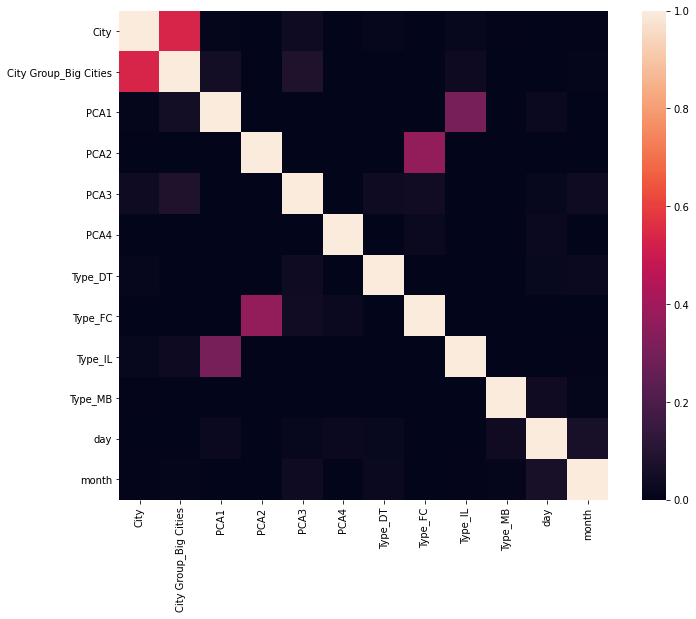

In [37]:
sorted_df = X_pca.reindex(sorted(X_pca.columns), axis=1)
corrmat = sorted_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1., vmin=0, square=True);

It doesn't seem like the variables are very correlated with the exception of PCA1 and PCA2. 

We'll use KNeighborsRegressor, a DecisionTreeRegressor, and a Ridge regressor. And we use a similiar function to perform gridsearch over all the models as was previously done for classification

In [38]:
MLA_reg = [  
     #KNeighborsRegressor
     neighbors.KNeighborsRegressor(),
     
     #DecisionTreeRegressor
     tree.DecisionTreeRegressor(),
    
     #RidgeRegressor
     linear_model.Ridge(),
]

In [39]:
def GridSearch_regression(df, target, MLA , score = 'neg_mean_absolute_error'):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #score - criteria to choose best set of hyperparameters

    grid_seed = [0]
    


    #IMPORTANT NOTE: the order of the parameters in grid_param has to match the order of the models in MLA
    grid_param = [
        
                 #KNeighborsRegressor
                 [{   
                     'clf__n_neighbors': [5,10,30,50],
                     'clf__weights': ['uniform', 'distance'],
                     'clf__algorithm': ['auto'],
                     'clf__metric': ['minkowski', 'manhattan']
                 }],

                 #DecisionTreeRegressor
                 [{
                      "clf__min_samples_split": [10, 20, 40],
                      "clf__max_depth": [2, 6, 8],
                      "clf__min_samples_leaf": [20, 40, 100],
                      "clf__max_leaf_nodes": [5, 20, 100],
                  }],

                 #RidgeRegressor
                 [{
                      'clf__alpha': (np.logspace(-8, 8, 100)),
                       # the solver did not improve results
                       # 'clf__solver': ['svd', 'cholesky', 'sparse_cg', 'sag'], 
                 }],
                    
            ]

    MLA_columns = [
        'Model Name', 
        'Best Parameters', 
        'Fit Time', 
        'Mean Absolute Error', 
        'Std Absolute Error', 
    ]
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    row_index = 0
    
    cv_split = model_selection.KFold(n_splits = 10, shuffle=True, random_state = 0 ) 

    start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
    
    print('Current Model:')
    for alg, param in zip (MLA, grid_param): #https://docs.python.org/3/library/functions.html#zip
        MLA_name = alg.__class__.__name__
        print(MLA_name)
        
        model = Pipeline([
        # ('smote', RandomOverSampler(sampling_strategy='auto',random_state=0)),
        ('clf', alg)
        ],)
        
        
        
        start = time.perf_counter()        
        best_search = model_selection.GridSearchCV(
            estimator = model, 
            param_grid = param[0], 
            cv = cv_split, 
            scoring = score,
            n_jobs=-1,
        )
        best_search.fit(df,target)
        run = time.perf_counter() - start
        print('Time to gridsearch:',run)

        best_param = best_search.best_params_
        #print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(model.__class__.__name__, best_param, run))
        model.set_params(**best_param) 
        
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Best Parameters'] = str(best_param)
        MLA_compare.loc[row_index, 'Fit Time'] = best_search.cv_results_['mean_fit_time'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean Absolute Error'] = best_search.cv_results_['mean_test_score'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std Absolute Error'] = best_search.cv_results_['std_test_score'][best_search.best_index_]
        row_index+=1



    run_total = time.perf_counter() - start_total


    print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
    MLA_compare.sort_values(by = ['Mean Absolute Error'], ascending = False, inplace = True)
    return MLA_compare

### 3.2 Performance Evaluation

Here are the results for the gridsearch.

In [40]:
regression_results = GridSearch_regression(X_pca, y_reg, MLA_reg , score = 'neg_mean_absolute_error')
regression_results

Current Model:
KNeighborsRegressor
Time to gridsearch: 755.3230895500001
DecisionTreeRegressor
Time to gridsearch: 174.40053346700006
Ridge
Time to gridsearch: 18.25389794700095
Total optimization time was 15.80 minutes.


,Model Name,Best Parameters,Fit Time,Mean Absolute Error,Std Absolute Error
2,Ridge,{'clf__alpha': 673.4150657750828},0.024,-5.4e+02,6.2
1,DecisionTreeRegressor,"{'clf__max_depth': 8, 'clf__max_leaf_nodes': 1...",0.71,-6.1e+02,7.3
0,KNeighborsRegressor,"{'clf__algorithm': 'auto', 'clf__metric': 'min...",0.74,-6.1e+02,6.5


In order to evaluate these results we need to know how the target variable behaves.

In [41]:
y_reg.describe()

count    100000.00
mean      14698.06
std        6705.08
min        6271.00
25%       10143.00
50%       12951.00
75%       16923.00
max       52294.00
Name: revenue, dtype: float64

As we can see the standard deviation is 6705 and the average is 14698, so comparitively a MAE of 541 is very good.
Curiously, contrarily to what happened with classification, the simplest model was the one that performed the best.

## 4. Ensemble Learning

From the three options presented, we chose a voting classifier/regressor, since it is one of the simplest ensemble methods, and a random forest, since it very well known and usually performs well. Besides these and the XGBoost option, there are many more ensemble methods available.

### 4.1 Voting Classifier/Regressor

* Use a voting classifier (http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)/regressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) to combine the best results of the `X` classifiers/regressors from previous sections. 

#### 4.1.1 Classification

Since GridSearch was already used in the first phase to find the best parameters, we don't think it is justified to perform it again. The approach of using gridsearch directly on the voting classifier would be more useful if we developed the classifier with an ensemble from the beggining. In our case, we will take the best models with the already found best parameters.


We created the function voting_fit_c, similar to the ones used in the first part, which creates a metrics report, as well as a table with specific metrics asked for this project and the confusion matrixes.

For the best models, we decided to use the best of each different classifier, but there were several different possibilities.

We decided to try two types of voting classifiers: Majority Class Labels (each classifier weighs the same) and Weighted Average Probabilities (each classifier has a weight associated and we can value more the models that performed best).
For the Weighted Average Probabilities we decided that the decision tree and the KNN should have equally high weights, since they both had good similar values, and the naive bayes should weigh a bit less. But this does not mean that it won't be beneficial for the voting! One of the advantages of ensemble methods that use different models is that they complement each other, balancing out their individual weaknesses.

In [52]:
def voting_fit_c(df, target, MLA, balancing = 'RandomOverSampler',draw_confusion_matrix=True,display_report = True):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #draw_confusion_matrix - show confusion matrix if true
    #display_report - prints table with metrics
    
    #create subplots for confusion matrix
    if draw_confusion_matrix:
        fig, ax = plt.subplots(1,2,figsize=(20,5))
    
    
    #split dataset in cross-validation
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 


    #index through MLA and save performance to table
    row_index = 0
    
    rebalanced_models=[]

    for alg in MLA:      
        #Rebalancing
        if balancing == 'RandomOverSampler':
            model = Pipeline([
            ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto',random_state=0)),
            ('classification', alg)
            ])
        elif balancing == 'SMOTE':
            model = Pipeline([
            ('smote', SMOTE(n_jobs=-1,random_state=0,sampling_strategy='auto' , k_neighbors=15)),
            ('classification', alg)
            ])
        else:
            model = Pipeline([
            ('classification', alg)
            ])
        rebalanced_models.append(model)
    
    hard_vc = VotingClassifier(estimators=[('1', rebalanced_models[0]), 
                                           ('2', rebalanced_models[1]), 
                                           ('3', rebalanced_models[2])], voting='hard')
    
    soft_vc = VotingClassifier(estimators=[('1', rebalanced_models[0]), 
                                           ('2', rebalanced_models[1]), 
                                           ('3', rebalanced_models[2])], voting='soft', weights=weights)
    
    models= [hard_vc, soft_vc]
    model_name=['Hard Voting', 'Soft Voting']

    
    #create table to compare MLA metrics 
    MLA_columns = [
        'Model Name',
        'Mean Accuracy', 
        'Std Accuracy', 
        'Mean precision', 
        'Std precision', 
        'Mean recall',
        'Std recall',
        'Mean F1',
        'Std F1',
    ]

    MLA_compare = pd.DataFrame(columns = MLA_columns)


    index=0
    for model in models:
        #make predictions with cross validation: 
        predictions = (model_selection.cross_val_predict(model, df, target, cv  = cv_split, 
                                                      n_jobs =-1))
        
        #build metrics table
        MLA_compare.loc[index, 'Model Name'] = model_name[index]
        MLA_compare.loc[index, 'Mean Accuracy'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='accuracy').mean()
        MLA_compare.loc[index, 'Std Accuracy'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='accuracy').std()
        MLA_compare.loc[index, 'Mean precision'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='precision_weighted').mean()
        MLA_compare.loc[index, 'Std precision'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='precision_weighted').std()
        MLA_compare.loc[index, 'Mean recall'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='recall_weighted').mean()
        MLA_compare.loc[index, 'Std recall'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='recall_weighted').std()
        MLA_compare.loc[index, 'Mean F1'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='f1_weighted').mean()
        MLA_compare.loc[index, 'Std F1'] = cross_val_score(models[index], df, target, cv=cv_split, scoring='f1_weighted').std()

        #build classification report       
        if display_report == True:
            print("Classification Report for model:",model_name[index])
            print(classification_report(target, predictions))
            print("------------------------------------------------")   

        if draw_confusion_matrix:
            #confusion matrix setting
            cf_matrix = metrics.confusion_matrix(target,predictions)


            group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
            group_percentages = ["{0:.1%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
            labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(len(cf_matrix),len(cf_matrix))

            cf_matrix = cf_matrix.astype(float)
            for i in range(cf_matrix.shape[0]):
                cf_matrix[i] = cf_matrix[i]/ cf_matrix[i].sum()
        
        
            #confusion matrix plot
            sns.heatmap(cf_matrix, fmt='', cmap='Blues',ax=ax[index],annot=labels,cbar=False,
                        square=True,xticklabels=["12K-20K","<12K",">20K"], yticklabels=["12K-20K","<12K",">20K"])
            ax[index].set_title(model_name[index])

        index+=1
    return MLA_compare

Classification Report for model: Hard Voting
              precision    recall  f1-score   support

     12K-20K       0.92      0.94      0.93     43933
        <12K       0.95      0.95      0.95     43418
        >20K       0.96      0.88      0.92     12649

    accuracy                           0.94    100000
   macro avg       0.94      0.92      0.93    100000
weighted avg       0.94      0.94      0.94    100000

------------------------------------------------
Classification Report for model: Soft Voting
              precision    recall  f1-score   support

     12K-20K       0.93      0.94      0.94     43933
        <12K       0.96      0.96      0.96     43418
        >20K       0.95      0.89      0.92     12649

    accuracy                           0.94    100000
   macro avg       0.95      0.93      0.94    100000
weighted avg       0.94      0.94      0.94    100000

------------------------------------------------


,Model Name,Mean Accuracy,Std Accuracy,Mean precision,Std precision,Mean recall,Std recall,Mean F1,Std F1
0,Hard Voting,0.94,0.0016,0.94,0.0016,0.94,0.0016,0.94,0.0016
1,Soft Voting,0.94,0.002,0.94,0.002,0.94,0.002,0.94,0.002


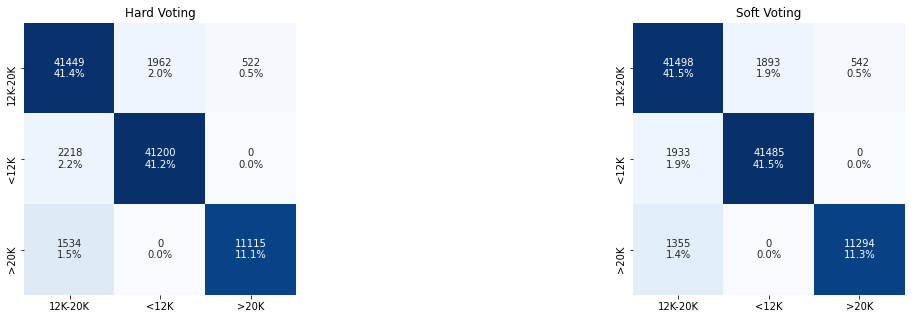

In [53]:
classifiers=[tree.DecisionTreeClassifier(criterion= 'gini', 
                                        max_depth= 6, 
                                        max_features= None, 
                                        min_samples_leaf= 10, 
                                        min_samples_split= 2, 
                                        random_state= 0, 
                                        splitter= 'best'),
             
             neighbors.KNeighborsClassifier(n_neighbors= 10, 
                                            algorithm = 'auto', 
                                            metric='minkowski',
                                            weights= 'uniform'),
             GaussianNB()]

weights=[0.4,0.4,0.2]
result_voting_c= voting_fit_c(X_pca, y, classifiers, weights)
result_voting_c

As we expected, this ensemble method performed overall slightly better than the individual classifiers, looking at the table with the summary of the metrics. It created a very well defined confusion matrix. It still classified correctly the elements from the undersamples class, which is sometimes challenging.

We can also see that the Weighted Average Probabilities performed slightly better than the Majority Class Labels. There were also some metrics that were not imporved, or even had worse values when compared to the single decision tree and k-neighbors models. This might mean that the Naive Bayes classifier is not the most adequate for this classification problem, and a voting ensemble which included more of the other two methods would perform even better.

#### 4.1.2 Regression

For regression, the voting ensemble is very similar, and so is our approach. We also used a function to evaluate the results of the best models from the first part ensembled. Once again, there was no need for gridsearch as the models found already have their parameters hypertuned.
For regression, there is not the option of adding weights to each model, so there is really not much tuning to do besides choosing the best models.

In [44]:
def voting_fit_r(df, target, regressor_models):
    #df - X  
    #target - Y
    #classifiers  - List of Classifiers Pipeline with set parameters and balanced classes
    #weights - List of ordered weights for each classifier, respectively
    #draw_confusion_matrix - show confusion matrix 
    
    #Changing to original target names instead of numerical values
    #target= target.map(inv_label_mapping)
    
    #split dataset in cross-validation folds
    cv_split = model_selection.KFold(n_splits = 10, shuffle=True, random_state = 0 ) 

    #create table to compare MLA metrics
    MLA_columns = [
        'Model Name',
        'Mean Absolute Error', 
        'Std Absolute Error', 
        'R2 Score'
    ]

    MLA_compare = pd.DataFrame(columns = MLA_columns)

    model = VotingRegressor(estimators=[('1', regressor_models[0]), ('2', regressor_models[1]), ('3', regressor_models[2])])
    
    model_name=['Voting Regressor']

    #make predictions with cross validation: 
    predictions = (model_selection.cross_val_predict(model, df, target, cv  = cv_split, 
                                                      n_jobs =-1))
    
    results = cross_val_score(model, df, target, cv=cv_split, scoring='neg_mean_absolute_error')
    #build metrics table
    MLA_compare.loc[0, 'Model Name'] = model_name
    MLA_compare.loc[0, 'Mean Absolute Error'] = results.mean()
    MLA_compare.loc[0, 'Std Absolute Error'] = results.std()
    MLA_compare.loc[0, 'R2 Score'] = cross_val_score(model, df, target, cv=cv_split, scoring='r2').mean()
    
    return MLA_compare


In [45]:
regressor_list = [KNeighborsRegressor(algorithm='auto',
                                  metric= 'minkowski', 
                                  n_neighbors= 10, 
                                  weights= 'distance'),
              tree.DecisionTreeRegressor(max_depth = 8,
                                         max_leaf_nodes = 100, 
                                         min_samples_leaf = 100, 
                                         min_samples_split = 10),
              linear_model.Ridge(alpha= 673.4150657750828)]

results_voting_r = voting_fit_r(df=X_pca, target=y_reg, regressor_models=regressor_list)
results_voting_r

,Model Name,Mean Absolute Error,Std Absolute Error,R2 Score
0,[Voting Regressor],-5.2e+02,5.7,0.99


This voting regressor is a clear example of what was said above, that putting different models together balances out their individual weaknesses! The ensemble has a mean absolute error of around 520, which is better than any of the individual methods, with a slight imporvement from the better model, and a noticeable improvement from the other two.

### 4.2 Random Forests

* Use [Random Forests](http://scikit-learn.org/stable/modules/ensemble.html#random-forests).

For this ensemble method, we will not just "join pre-made models", so it is once again justified to use a gridsearch to find the best parameters for the forest. We will use functions similar to the ones explained before.

#### 4.2.1 Classification

In [46]:
def GridSearch_rfc(df, target, MLA , score = 'accuracy'):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #score - criteria to choose best set of hyperparameters

    grid_seed = [0]

    #IMPORTANT NOTE: the order of the parameters in grid_param has to match the order of the models in MLA
    grid_param = [{'clf__n_estimators': [10, 25, 50, 100],
                   'clf__max_depth': [10, 20, 40, 50],
                   'clf__criterion': ['gini', 'entropy']
                   }]

    MLA_columns = [
        'Model Name', 
        'Best Parameters', 
        'Fit Time', 
        'Mean Accuracy', 
        'Std Accuracy', 
        'Mean precision', 
        'Std precision', 
        'Mean recall',
        'Std recall',
        'Mean F1',
        'Std F1',
    ]
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    row_index = 0
    
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 

    start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
    
    print('Current Model:')
    for alg, param in zip (MLA, grid_param): #https://docs.python.org/3/library/functions.html#zip
        MLA_name = alg.__class__.__name__
        print(MLA_name)
        
        model = Pipeline([
        ('smote', RandomOverSampler(sampling_strategy='auto',random_state=0)),
        ('clf', alg)
        ],)
        
        
        
        start = time.perf_counter()        
        best_search = model_selection.GridSearchCV(
            estimator = model, 
            param_grid = grid_param, 
            cv = cv_split, 
            scoring = score,
            n_jobs=-1,
            refit = 'f1_weighted',
        )
        best_search.fit(df,target)
        run = time.perf_counter() - start
        print('Time to gridsearch:',run)

        best_param = best_search.best_params_
        #print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(model.__class__.__name__, best_param, run))
        model.set_params(**best_param) 
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Best Parameters'] = str(best_param)
        MLA_compare.loc[row_index, 'Fit Time'] = best_search.cv_results_['mean_fit_time'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean Accuracy'] = best_search.cv_results_['mean_test_accuracy'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std Accuracy'] = best_search.cv_results_['std_test_accuracy'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean precision'] = best_search.cv_results_['mean_test_precision'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std precision'] = best_search.cv_results_['std_test_precision'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean recall'] = best_search.cv_results_['mean_test_recall'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std recall'] = best_search.cv_results_['std_test_recall'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean F1'] = best_search.cv_results_['mean_test_f1_weighted'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std F1'] = best_search.cv_results_['std_test_f1_weighted'][best_search.best_index_]
        
        row_index+=1



    run_total = time.perf_counter() - start_total


    print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
    MLA_compare.sort_values(by = ['Mean F1'], ascending = False, inplace = True)
    return MLA_compare

In [65]:
MLA= [RandomForestClassifier()]
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}

model_rfc= GridSearch_rfc(X_pca, y, MLA , score = scoring)
model_rfc

Current Model:
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Time to gridsearch: 2711.7370604440002
Total optimization time was 45.20 minutes.


,Model Name,Best Parameters,Fit Time,Mean Accuracy,Std Accuracy,Mean precision,Std precision,Mean recall,Std recall,Mean F1,Std F1
0,RandomForestClassifier,"{'clf__criterion': 'entropy', 'clf__max_depth'...",42,0.95,0.00092,0.95,0.0022,0.95,0.0017,0.95,0.00092


In [66]:
model_rfc['Best Parameters'][0]

"{'clf__criterion': 'entropy', 'clf__max_depth': 50, 'clf__n_estimators': 100}"

In [61]:
def Fit_class_rfc(df, target, MLA, balancing = 'RandomOverSampler',draw_confusion_matrix=True,display_report = True):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #draw_confusion_matrix - show confusion matrix if true
    #display_report - prints table with metrics
    
    #create subplots for confusion matrix
    if draw_confusion_matrix:
        fig = plt.figure(figsize=(20,5), num='Random Forest Classifier')
    
    
    #split dataset in cross-validation
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 
    #create table to compare MLA metrics
    MLA_columns = ['Model Name', 'Parameters','Mean Accuracy', 'Mean F1','Mean Precision','Mean Recall','Fit Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)


    #index through MLA and save performance to table
    row_index = 0
    
    #dictionary with reports
    report_dict = {}
    for alg in MLA:
        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
        
        #Rebalancing
        if balancing == 'RandomOverSampler':
            model = Pipeline([
            ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto',random_state=0)),
            ('classification', alg)
            ])
        elif balancing == 'SMOTE':
            model = Pipeline([
            ('smote', SMOTE(n_jobs=-1,random_state=0,sampling_strategy='auto' , k_neighbors=15)),
            ('classification', alg)
            ])
        else:
            model = Pipeline([
            ('classification', alg)
            ])

        #make predictions with cross validation: 
        predictions = (model_selection.cross_val_predict(model, df, target, cv  = cv_split, 
                                                     n_jobs =-1))
        
        
        #build classification report
        
        if display_report == True:
            print("Classification Report for model:",MLA_name)
            print(classification_report(target, predictions))
            print("------------------------------------------------")
        else:
            report = classification_report(target, predictions,output_dict=True)
            report_dict[MLA_name] =  report


        if draw_confusion_matrix:
            #confusion matrix setting
            cf_matrix = metrics.confusion_matrix(target,predictions)


            group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
            group_percentages = ["{0:.1%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
            labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(len(cf_matrix),len(cf_matrix))

            cf_matrix = cf_matrix.astype(float)
            for i in range(cf_matrix.shape[0]):
                cf_matrix[i] = cf_matrix[i]/ cf_matrix[i].sum()
            
            
            #confusion matrix plot
            sns.heatmap(cf_matrix, fmt='', cmap='Blues',annot=labels,cbar=False,
                        square=True,xticklabels=["12K-20K","<12K",">20K"], yticklabels=["12K-20K","<12K",">20K"])
        row_index+=1
    
    if display_report == False:
        return report_dict

Classification Report for model: RandomForestClassifier
              precision    recall  f1-score   support

     12K-20K       0.94      0.94      0.94     43933
        <12K       0.96      0.96      0.96     43418
        >20K       0.93      0.94      0.94     12649

    accuracy                           0.95    100000
   macro avg       0.95      0.95      0.95    100000
weighted avg       0.95      0.95      0.95    100000

------------------------------------------------


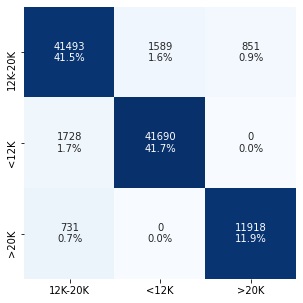

In [67]:
MLA= [RandomForestClassifier(n_estimators=100, max_depth=50, criterion= 'entropy')]
result_rfc= Fit_class_rfc(X_pca, y, MLA, balancing = 'RandomOverSampler',draw_confusion_matrix=True,display_report = True)
result_rfc

The Random Forest Classifier, also improved the classification results, even more than the voting classifier.
Here we can see a very clear improvement on the scores, specially of the undersampled class.

#### 4.2.2 Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor

def GridSearch_rfr(df, target, MLA , score = 'neg_mean_absolute_error'):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #score - criteria to choose best set of hyperparameters

    grid_seed = [0]
    


    #IMPORTANT NOTE: the order of the parameters in grid_param has to match the order of the models in MLA
    grid_param = [
                 [{'clf__n_estimators': [100],
                  'clf__criterion': ['mse'],
                  'clf__max_depth': [2,8,10, None], 
                  'clf__oob_score': [True], 
                  'clf__random_state': [0]}],                 
            ]

    MLA_columns = [
        'Model Name', 
        'Best Parameters', 
        'Fit Time', 
        'Mean Absolute Error', 
        'Std Absolute Error', 
    ]
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    row_index = 0
    
    cv_split = model_selection.KFold(n_splits = 10, shuffle=True, random_state = 0 ) 

    start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
    
    print('Current Model:')
    for alg, param in zip (MLA, grid_param): #https://docs.python.org/3/library/functions.html#zip
        MLA_name = alg.__class__.__name__
        print(MLA_name)
        
        model = Pipeline([
        # ('smote', RandomOverSampler(sampling_strategy='auto',random_state=0)),
        ('clf', alg)
        ],)
        
        
        
        start = time.perf_counter()        
        best_search = model_selection.GridSearchCV(
            estimator = model, 
            param_grid = param[0], 
            cv = cv_split, 
            scoring = score,
            n_jobs=-1,
        )
        best_search.fit(df,target)
        run = time.perf_counter() - start
        print('Time to gridsearch:',run)

        best_param = best_search.best_params_
        #print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(model._class.name_, best_param, run))
        model.set_params(**best_param) 
        
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Best Parameters'] = str(best_param)
        MLA_compare.loc[row_index, 'Fit Time'] = best_search.cv_results_['mean_fit_time'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean Absolute Error'] = best_search.cv_results_['mean_test_score'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Std Absolute Error'] = best_search.cv_results_['std_test_score'][best_search.best_index_]
        row_index+=1



    run_total = time.perf_counter() - start_total


    print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
    MLA_compare.sort_values(by = ['Mean Absolute Error'], ascending = False, inplace = True)
    return MLA_compare

In [69]:
MLA= [RandomForestRegressor()]
results_rfr_ensemble = GridSearch_rfr(X_pca, y_reg, MLA , score = 'neg_mean_absolute_error')
results_rfr_ensemble

Current Model:
RandomForestRegressor


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Time to gridsearch: 1198.322911274001
Total optimization time was 19.97 minutes.


,Model Name,Best Parameters,Fit Time,Mean Absolute Error,Std Absolute Error
0,RandomForestRegressor,"{'clf__criterion': 'mse', 'clf__max_depth': No...",1e+02,-4.8e+02,5.8


The mean absolute error is around 480, which is better than all of the regression models used so far.

## 5. Conclusions

* Overall, we obtained very good results, both on the classification task and on the regression task.
* Preprocessing is an essential step that can highly influence the results, since it affects important characteristics of the data such as the number of features, their distribution, etc.
* The metrics used allowed a good understanding of the quality of each model, and the confusion matrix are specially useful since they allow a visual interpretation.
* These tasks contain several steps, including cross-validation and hyperparameter tuning, so a pipeline approach becomes useful.
* Classification was very successful overall, and all models were able to fully distinguish between the biggest (>20k) and smallest (<12k) revenue classes of restaurants (represented by the two zeros in the confusion matrixes).
* Regression was also successful, being able to predict with a relatively small error the revenue of a restaurant.
* The ensemble methods improved the results, but were also more computationally intensive.



